In [1]:
import pandas as pd
pd.options.display.max_columns = 200
pd.options.display.max_rows = 400

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set_style("whitegrid")

In [2]:
from matplotlib import rcParams

rcParams['figure.figsize'] = 10, 8
rcParams['font.size'] = 16
rcParams['axes.labelsize'] = 14
rcParams['xtick.labelsize'] = 13
rcParams['ytick.labelsize'] = 13
rcParams['legend.fontsize'] = 15

In [3]:
from IPython.display import Image

# Данные

In [4]:
df = pd.read_csv(
    # путь к вашему файлу pokemon_full
    'pokemon_full.csv'
)
df.drop('Number', axis=1, inplace=True)

In [5]:
print(df.shape)
df.head()

(721, 22)


,Name,Type_1,Type_2,Total,HP,Attack,Defense,Sp_Atk,Sp_Def,Speed,Generation,isLegendary,Color,hasGender,Pr_Male,Egg_Group_1,Egg_Group_2,hasMegaEvolution,Height_m,Weight_kg,Catch_Rate,Body_Style
0,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False,Green,True,0.875,Monster,Grass,False,0.71,6.9,45,quadruped
1,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False,Green,True,0.875,Monster,Grass,False,0.99,13.0,45,quadruped
2,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False,Green,True,0.875,Monster,Grass,True,2.01,100.0,45,quadruped
3,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False,Red,True,0.875,Monster,Dragon,False,0.61,8.5,45,bipedal_tailed
4,Charmeleon,Fire,NaN,405,58,64,58,80,65,80,1,False,Red,True,0.875,Monster,Dragon,False,1.09,19.0,45,bipedal_tailed


<div class="panel panel-info" style="margin: 50px 0 0 0">
    <div class="panel-heading">
        <h3 class="panel-title">Задание 1: Первый взгляд</h3> 
    </div>
</div>

Построй 4 гистограммы (__histogram__) на 30 бинов главнхых 4 характеристик покемонов: 

* `HP` - здоровья
* `Attack` - уровня атаки
* `Defense` - уровня защиты
* `Speed` - скорости

Конечно, построить их надо на одном графике с 4 подграфиками (__axes__). Не забудь выделить достаточно места (параметр __figsize__).

In [6]:
# Ваш код здесь

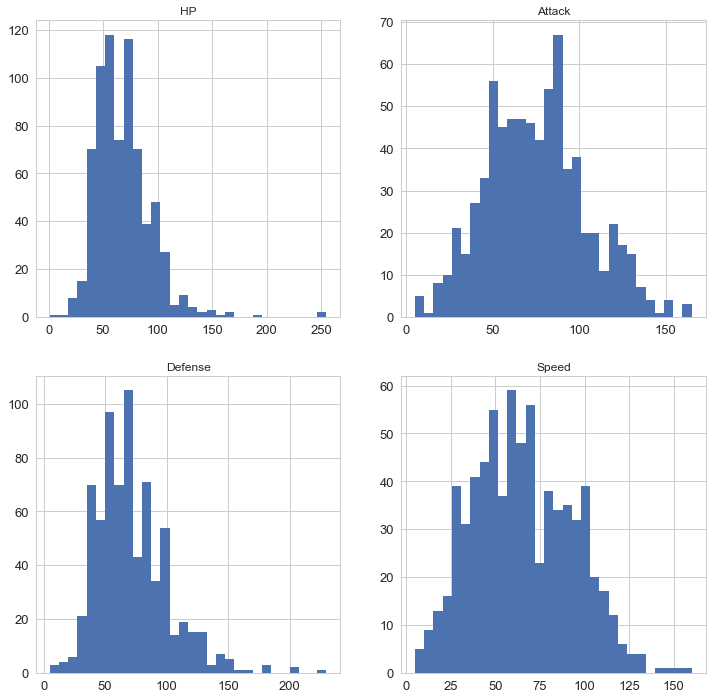

In [7]:
f, axs = plt.subplots(2,2, figsize=(12, 12))
axs[0,0].hist(df.HP, bins=30);
axs[0,0].set_title('HP');
axs[0,1].hist(df.Attack, bins=30);
axs[0,1].set_title('Attack');
axs[1,0].hist(df.Defense, bins=30);
axs[1,0].set_title('Defense');
axs[1,1].hist(df.Speed, bins=30);
axs[1,1].set_title('Speed');

Что видно? Есть странные большие значения?

Кажется, в __HP__ точно есть одно. Давай построим __boxplot__ и проверим, что оно там наверняка есть.

In [8]:
# Ваш код здесь

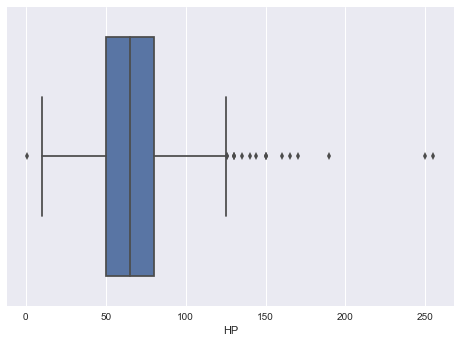

In [9]:
import seaborn as sns
sns.set()
sns.boxplot(x="HP", data=df);

<div class="panel panel-warning">
    <div class="panel-heading">
        <h3 class="panel-title">Бонус</h3> 
    </div>
</div>

Прежде всего найди этих странных покемонов! У кого это больше __220__ жизней? А кто этот задохлик, у кого меньше __5__ здоровья? Выведи их имена!

И покажи им, кто здесь главный, урезав им уровень здоровья с помощью __99% винсоризации__!

Не забудь построить снова __boxplot__ и убедиться, что картинка другая. Правда?

In [10]:
# Ваш код здесь

In [11]:
print(df[['Name','HP']][df.HP<5])
print(df[['Name','HP']][df.HP>220])

         Name  HP
291  Shedinja   1
        Name   HP
112  Chansey  250
241  Blissey  255


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


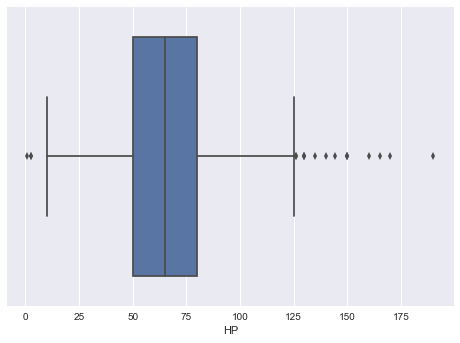

In [12]:
df.HP[df.HP>220]*=0.01
sns.boxplot(x="HP", data=df)

In [13]:
print(df[['Name','HP']][df.HP>220])

Empty DataFrame
Columns: [Name, HP]
Index: []


<div class="panel panel-info" style="margin: 50px 0 0 0">
    <div class="panel-heading">
        <h3 class="panel-title">Задание 2: Красный значит сильный?</h3> 
    </div>
</div>

У детей 4 лет и немного старше повелось, что красная машинка быстрее ездит, потому что она красная. Красный самолетик быстрее летит. Но бьются ли красные покемоны сильнее всех? 

* Сгруппируй всех покемонов по цвету (`Color`), усредни их атаку (`Attack`) в каждой группе.
* Построй __bar plot__, не забыв:
    * Раскрасить столбцы (каждый в свой цвет) с помощью словаря `colors`.
    * Обвести столбцы черной линией толщиной 1, чтобы белый столбец не потерялся.

C:\ProgramData\Anaconda3\lib\site-packages\pandas\plotting\_core.py:178: UserWarning: 'colors' is being deprecated. Please use 'color'instead of 'colors'
  warnings.warn(("'colors' is being deprecated. Please use 'color'"


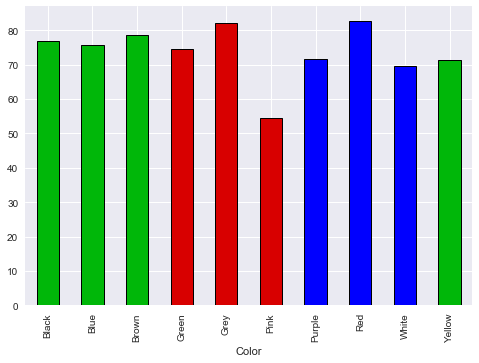

In [34]:
colors = { 
    'Red':    '#d80000',
    'Grey':   '#777777',
    'Brown':  '#8e4204',
    'Black':  '#000000',
    'Blue':   '#0000ff',
    'Green':  '#00b709',
    'Purple': '#930091',
    'Yellow': '#f2f218',
    'White':  '#ffffff',
    'Pink':   '#ffaac5'
}

# Ваше код здесь
df.groupby('Color').agg('mean')['Attack'].plot.bar(edgecolor='black', linewidth=1, colors=df.Color.apply(lambda x: colors[x]))
#перераскрасить!

<div class="panel panel-info" style="margin: 50px 0 0 0">
    <div class="panel-heading">
        <h3 class="panel-title">Задание 3: Тот самый график</h3> 
    </div>
</div>

Саше нужно построить __stacked normalized bar chart__, на котором будет отлично видно, _какова доля легендарных покемонов в каждом поколении_. 

Помогите Саше  : )

_Лайфхак:_ если включить мозги, то с помощью __pivot table__ можно облегчить себе работу.

In [15]:
# Ваш код здесь

In [16]:
table = pivot_table(df, values='Generation', index=['isLegendary'], columns=['isLegendary'], aggfunc=np.sum)

NameError: name 'pivot_table' is not defined

In [17]:
tps = df.pivot_table(values=['Total_Products_Sold'], 
                      index='Week_Days',
                      columns='Category',
                      aggfunc='sum')

tps = tps.div(tps.sum(1), axis=0)
tps.plot(kind='bar', stacked=True)

KeyError: 'Total_Products_Sold'

In [18]:
df.head()

,Name,Type_1,Type_2,Total,HP,Attack,Defense,Sp_Atk,Sp_Def,Speed,Generation,isLegendary,Color,hasGender,Pr_Male,Egg_Group_1,Egg_Group_2,hasMegaEvolution,Height_m,Weight_kg,Catch_Rate,Body_Style
0,Bulbasaur,Grass,Poison,318,45.0,49,49,65,65,45,1,False,Green,True,0.875,Monster,Grass,False,0.71,6.9,45,quadruped
1,Ivysaur,Grass,Poison,405,60.0,62,63,80,80,60,1,False,Green,True,0.875,Monster,Grass,False,0.99,13.0,45,quadruped
2,Venusaur,Grass,Poison,525,80.0,82,83,100,100,80,1,False,Green,True,0.875,Monster,Grass,True,2.01,100.0,45,quadruped
3,Charmander,Fire,NaN,309,39.0,52,43,60,50,65,1,False,Red,True,0.875,Monster,Dragon,False,0.61,8.5,45,bipedal_tailed
4,Charmeleon,Fire,NaN,405,58.0,64,58,80,65,80,1,False,Red,True,0.875,Monster,Dragon,False,1.09,19.0,45,bipedal_tailed


<div class="panel panel-info" style="margin: 50px 0 0 0">
    <div class="panel-heading">
        <h3 class="panel-title">Задание 4: I8∑π and it was delicious!</h3> 
    </div>
</div>

Сейчас простое задание. Честно. 

Построй __pie chart__ разных типов покемонов. С тенью!

In [19]:
# Ваш код здесь

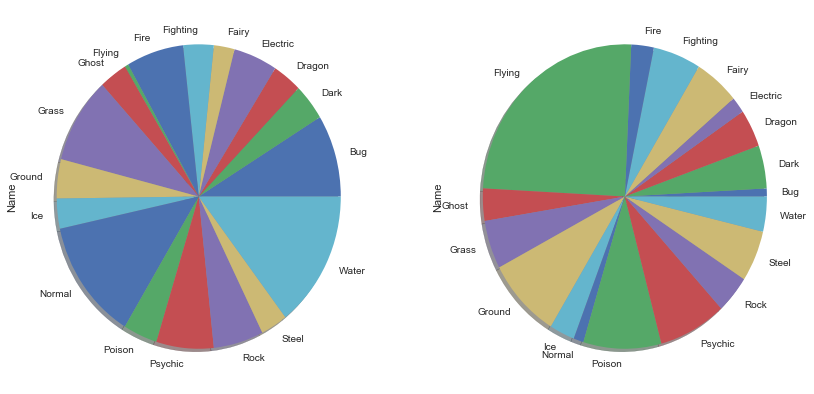

In [24]:
f, axs=plt.subplots(1,2, figsize=(14,7))
df.groupby('Type_1').count().Name.plot.pie(ax=axs[0], shadow=True)
df.groupby('Type_2').count().Name.plot.pie(ax=axs[1], shadow=True)

<div class="panel panel-info" style="margin: 50px 0 0 0">
    <div class="panel-heading">
        <h3 class="panel-title">Задание 5: Больше усов</h3> 
    </div>
</div>

Постройте разные __box plot__ силы (__Total__) каждого из типа покемонов (__Type_1__), но отсортируйте их расположение на графике по их __медианам__, от самых слабых к самым сильным.

In [25]:
# Ваш код здесь

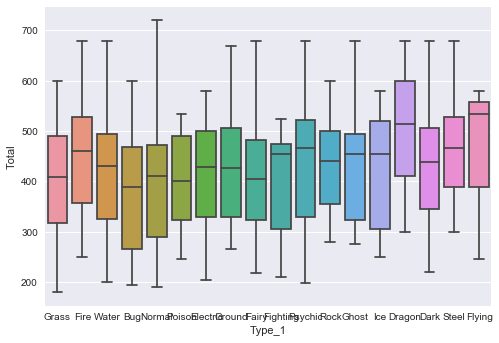

In [28]:
sns.boxplot(x='Type_1', y='Total', data=df)
#отсортировать

<div class="panel panel-info" style="margin: 50px 0 0 0">
    <div class="panel-heading">
        <h3 class="panel-title">Задание 6: Так и сяк</h3> 
    </div>
</div>

1. Построй __jointplot__ между __Catch Rate__ и __Total__. Обрати внимание, что на нем есть коэффициент корреляции Пирсона и гистограммы величин.
2. Построй __lmplot__ между __Catch Rate__ и __Total__. Обрати внимание, что на нем есть линия, выделяющая зависимость, но нет коэффициента корреляции или гистограмм.
3. Попробуй построить оба графика на __subplots__ matplotlib'а. Убедись, что у тебя не получилось, так как гистограммы на __jointplot__'е тоже упакованы в разные оси.

Разочаруйся.

In [35]:
# Ваш код здесь

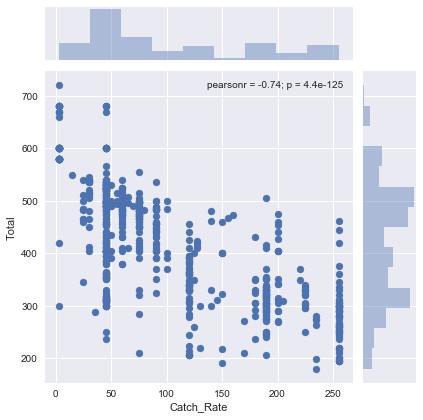

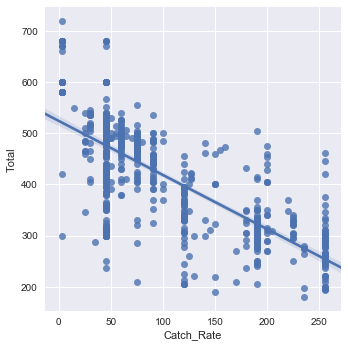

In [36]:
sns.jointplot(x='Catch_Rate', y='Total', data=df)
sns.lmplot(x='Catch_Rate', y='Total', data=df)

TypeError: inner() got multiple values for argument 'ax'

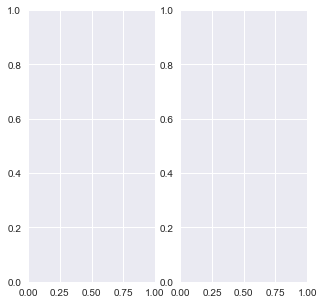

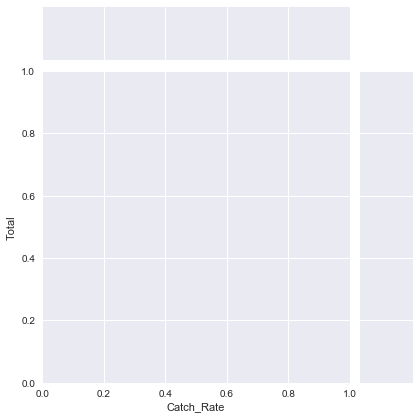

In [37]:
f, axs=plt.subplots(1,2, figsize=(5, 5))
sns.jointplot(x='Catch_Rate', y='Total', data=df, ax=axs[0]);
sns.lmplot(x='Catch_Rate', y='Total', data=df, ax=axs[1]);

<div class="panel panel-info" style="margin: 50px 0 0 0">
    <div class="panel-heading">
        <h3 class="panel-title">Задание 7: На голову выше</h3> 
    </div>
</div>

Время проверить, что даже тщедушные легендарные покемоны сильнее даже очень крутых, но простецких, не_легендарных. 

Я буду описывать тебе, как заказчик, что хочу, а ты так и нарисуешь, окда?

* На графике должно быть 4 __violin plot__: для `HP`, `Attack`, `Defense` и `Speed`.
* На каждый из которых должен быть нанесены квартили.
* Каждый из которых должен быть разделенный (__`split=True`__), как [здесь](http://seaborn.pydata.org/examples/grouped_violinplots.html). Но если в примере разделение по полу, то здесь как раз по __isLegendary__.

_Лайфхак:_ если включить мозги, то с помощью __melt__ можно облегчить себе работу.

In [38]:
# Ваш код здесь

<div class="panel panel-info" style="margin: 50px 0 0 0">
    <div class="panel-heading">
        <h3 class="panel-title">Задание 0: Новое начало</h3> 
    </div>
</div>

_..ты проснулся на лекции. Рядом стоит Ольферук и говорит: "Хорош, ты первый, кто у меня вырубился на занятиях!"_

_Ты хлопаешь глазами. "А эт самое," - бормочешь, - "а покемоны?"_

_"Че?" - Ольферук, кажется, в замешательстве. "Ты, блин, как в том анекдоте"_

Домашка по визуализации, - помнишь?

In [39]:
df = pd.read_csv(
    # путь к твоему файлу data.csv с прошлой домашки
    '..\Homework1/data.csv'
)

df=df.rename(columns={'Возраст':'age',
                     'Пол':'sex',
                     'Состоит в браке':'married',
                     'Иждивенцы':'dependents',
                     'Доход':'income',
                     'Опыт работы':'experience_work',
                     'Срок проживания':'residence_period',
                     'Недвижимость(кв.м.)':'area_square',
                     'Месячный платеж':'payment_month',
                     'Благонадежный заемщик':'trustworthiness'})

renaming_sex={'женский':0, 'мужской':1}
renaming_yesno={'Да': 1, 'Нет': 0}
df.sex=df.sex.map(renaming_sex)
df.married=df.married.map(renaming_yesno)
df.trustworthiness=df.trustworthiness.map(renaming_yesno)

df=df[~df.isnull().any(axis=1)]

df['income_payment_ratio']=df.payment_month/df.income
df['family_size']=df.dependents+df.married+1
df['clearincome_familysize_ratio']=(df.income-df.payment_month)/df.family_size

tags=[0, 18, 30, 50, 99]
group_names=['child', 'young', 'mature', 'old']
df['age_group']=pd.cut(df.age, tags, labels=group_names)

In [40]:
print(df.shape)
df.head()

(999, 14)


,age,sex,married,dependents,income,experience_work,residence_period,area_square,payment_month,trustworthiness,income_payment_ratio,family_size,clearincome_familysize_ratio,age_group
0,28.0,0.0,1.0,0.0,9000.0,9.0,7.0,0.0,3946.0,0.0,0.438444,2.0,2527.000000,young
1,39.0,1.0,1.0,1.0,13500.0,17.0,6.0,0.0,2460.0,1.0,0.182222,3.0,3680.000000,mature
2,31.0,1.0,0.0,2.0,7000.0,11.0,3.0,0.0,3126.0,0.0,0.446571,3.0,1291.333333,mature
3,34.0,1.0,0.0,1.0,10200.0,15.0,2.0,41.0,3280.0,1.0,0.321569,2.0,3460.000000,mature
4,46.0,0.0,1.0,2.0,8500.0,20.0,8.0,0.0,3348.0,1.0,0.393882,4.0,1288.000000,mature


<div class="panel panel-info" style="margin: 50px 0 0 0">
    <div class="panel-heading">
        <h3 class="panel-title">Задание 1: Разрез общества</h3> 
    </div>
</div>

Создай __FacetGrid__ из возрастных групп по столбцам и полу по строкам. В каждом подграфике нарисуй __гистограмму__ ежемесячного платежа.

In [41]:
# Ваш код здесь

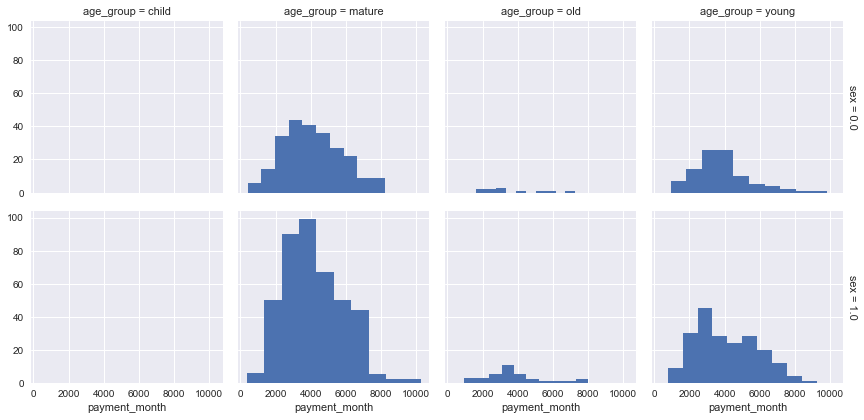

In [42]:
g = sns.FacetGrid(df, row='sex', col='age_group', margin_titles=True)
g.map(plt.hist, 'payment_month');

<div class="panel panel-info" style="margin: 50px 0 0 0">
    <div class="panel-heading">
        <h3 class="panel-title">Задание 2: Полезный признак</h3> 
    </div>
</div>

Нарисуй диаграмму рассеяния (__scatter plot__), где по оси абсцисс отложи _доход_, а по оси ординат - _величина месячного платежа_.

Не забудь раскрасить в разные цвета в зависимости от того, благонадежен ли клиент! 

In [43]:
# Ваш код здесь

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  after removing the cwd from sys.path.
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\__init__.py:917: UserWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  warnings.warn(self.msg_depr_set % key)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\rcsetup.py:152: UserWarning: axes.hold is deprecated, will be removed in 3.0
  warnings.warn("axes.hold is deprecated, will be removed in 3.0")
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match D

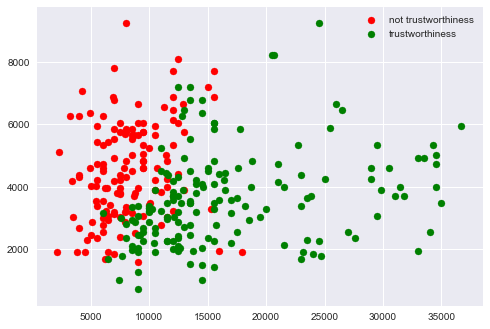

In [44]:
trust = df.trustworthiness==1
x=df[0:300]
y=df[0:300]
plt.hold(True)
plt.scatter(x[~trust].income, x[~trust].payment_month, label='not trustworthiness', c='red')
plt.scatter(x[trust].income, x[trust].payment_month, label='trustworthiness', c='green')
plt.legend()
plt.show()

<div class="panel panel-info" style="margin: 50px 0 0 0">
    <div class="panel-heading">
        <h3 class="panel-title">Задание 3: Ненужный нужный график</h3> 
    </div>
</div>

Построй диаграмму рассеяния доли ежемесячого платежа по оси X и благонадежности по Y. Как видишь, множество точек слиплись, и не ясно, где мы можем провести разделяющую границу по признаку доли ежемемячного платежа.

Поэтому ниже построй тот самый __stripplot__ с параметром __`jitter=True`__, чтобы посмотреть на тот же по сути график, но оценивая объем данных в каждой из групп. Кроме того, сделай пожалуйста, линию той самой разделяющей границы по признаку доли платежа, - пока что на глаз! А уже через неделю будем делать первые предсказания реальными алгоритмами.

In [45]:
# Ваш код здесь

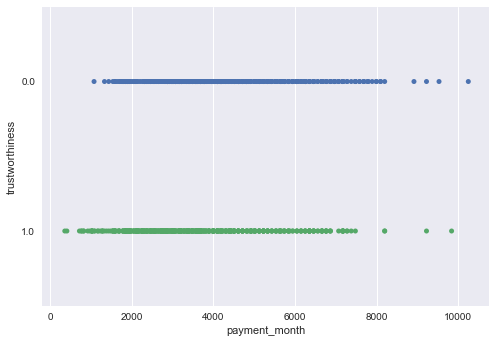

In [46]:
sns.stripplot(y='trustworthiness', x='payment_month', orient='h', data=df)

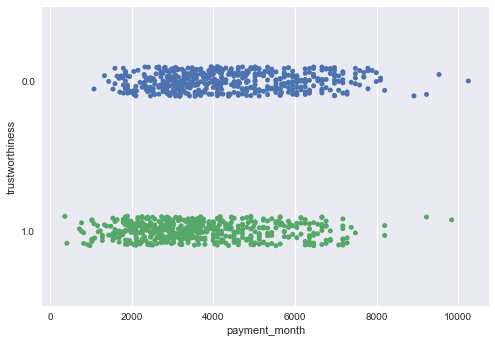

In [47]:
sns.stripplot(y='trustworthiness', x='payment_month', orient='h', data=df, jitter=True)
#как строить разделяющую прямую

<div class="panel panel-success" style="margin: 50px 0 0 0">
    <div class="panel-heading">
        <h3 class="panel-title">Финиш!</h3> 
    </div>
</div>

Если ты действительно добрался до этого места в тетрадке и честно все нарисовал, - красавчик! Обязательно расскажи мне об этом на следующем занятии.